<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/VacuumExpectationValue1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The vacuum contribution to the momentum density of the magnetoelectric material is:
oo*hbar*sqrt(Abs(nkl_x)**2 + Abs(2*nkl_x - nkl_y)**2 + Abs(nkl_x - nkl_y + nkl_z)**2)
4*pi**2*Dc*h_bar/(c*l**4*n0)
The maximum speed at the center of the pipe is 24.95 m/s
The terminal angular speed is 1.00 rad/s
The characteristic time is 0.00 s


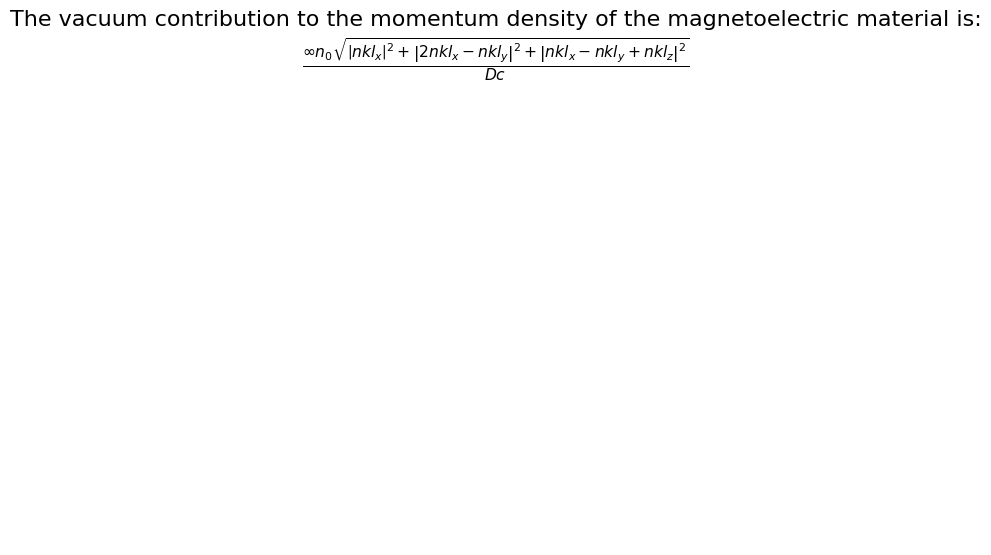

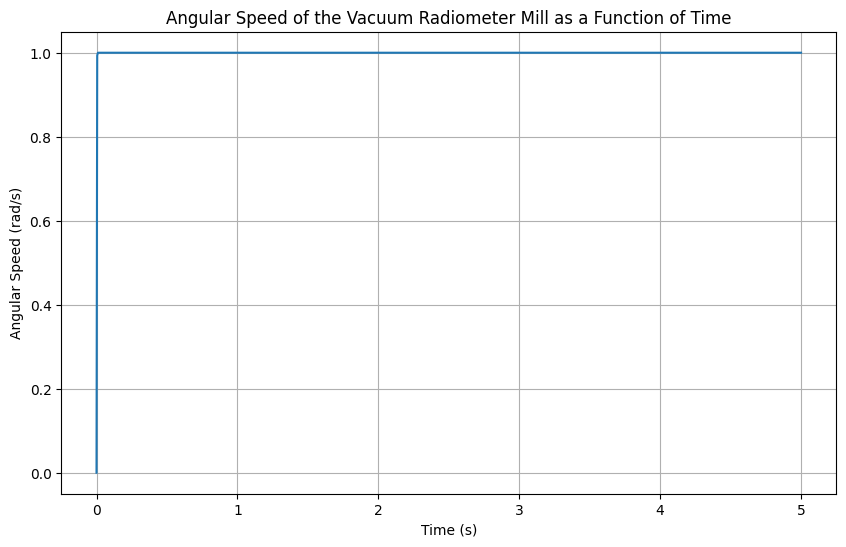

In [5]:
#!pip install simpy
from sympy import Symbol, Eq, Matrix, integrate, oo, pi, solve

# Step 1: Expectation value for the momentum density g0 of the vacuum
V, hbar = Symbol('V'), Symbol('hbar')
kl, k = Symbol('kl'), Matrix([Symbol('kx'), Symbol('ky'), Symbol('kz')])
g0 = 1/V * (1/2) * hbar * k.norm()

# Step 2: Dispersion relation for the magnetoelectric medium
nkl, ez = Matrix([Symbol('nkl_x'), Symbol('nkl_y'), Symbol('nkl_z')]), Matrix([Symbol('ez_x'), Symbol('ez_y'), Symbol('ez_z')])
k0 = Symbol('k0')
dispersion_relation = Eq(k.dot(ez), k0 * nkl.norm())

# Solve dispersion relation for k
k_sol = solve(dispersion_relation, k)[0]

# Step 3: Express g0 in terms of anisotropic indices
Dc = Symbol('Dc')
nkl_dot = nkl.dot(Matrix([1, -1, 0]))
nkl_dot_matrix = Matrix([nkl_dot, nkl_dot, nkl_dot])
g0_anisotropic = 1/V * (1/2) * hbar * k0 * (nkl + nkl_dot_matrix).norm()
g0_anisotropic = g0_anisotropic.subs(k, k_sol)

# Step 4: Perform integration for g0
k_mag = Symbol('k_mag')
g0_integral = integrate(k_mag**3, (k_mag, 0, oo))

# Step 5: Final result for g0
g0_final = g0_anisotropic.subs(k0, V/(8*pi**3) * g0_integral).subs(nkl, Matrix([Symbol('n0_x'), Symbol('n0_y'), Symbol('n0_z')]))

# Printing the final result
print("The vacuum contribution to the momentum density of the magnetoelectric material is:")
print(g0_final)

import sympy as sp
import sympy as sp

# Define the constants and variables
h_bar = 1.0545718e-34  # Reduced Planck's constant
V = 1e-6  # Sample volume, in m^3
k0 = sp.Symbol('k0')  # Wavenumber, in 1/m
c = 3e8  # Speed of light, in m/s
u = sp.Symbol('u')  # Velocity, much less than c for non-relativistic context
n0 = sp.Symbol('n0')  # Refractive index parallel to the optical axis, typically 1 - 2.5
cxy = sp.Symbol('cxy')  # Anisotropic parameter
cyx = sp.Symbol('cyx')  # Anisotropic parameter
Dc = sp.Symbol('Dc')  # Difference in anisotropic parameters
p = sp.pi  # Pi constant
ez = sp.Symbol('ez')  # Parallel to the optical axis
l = sp.Symbol('l', positive=True, real=True)  # Wavelength, typically between 400 - 700 nm

# Add constraints
constraints = [
    sp.Q.positive(k0),  # Wavenumber is positive
    1 <= n0, n0 <= 2.5,  # Refractive index between 1 and 2.5
    4e-7 <= l, l <= 7e-7  # Wavelength of visible light in meters
]


# Define the constants and variables
h_bar = sp.Symbol('h_bar')  # Reduced Planck's constant
V = sp.Symbol('V')  # Sample volume
k0 = sp.Symbol('k0')  # Wavenumber
c = sp.Symbol('c')  # Speed of light
u = sp.Symbol('u')  # Velocity
n0 = sp.Symbol('n0')  # Refractive index parallel to the optical axis
cxy = sp.Symbol('cxy')  # Anisotropic parameter
cyx = sp.Symbol('cyx')  # Anisotropic parameter
Dc = sp.Symbol('Dc')  # Difference in anisotropic parameters
p = sp.pi  # Pi constant
ez = sp.Symbol('ez')  # Parallel to the optical axis
l = sp.Symbol('l')  # Wavelength

# Equation 3.1
g0_31 = (h_bar * k0) / (2 * V)

# Equation 3.2
k_ez = k0 * n0

# Equation 3.3
# Note: The sum over k0 from -oo to +oo may require an appropriate physical or mathematical limit to be set.
g0_33 = h_bar * sp.Sum(k0 * (k0 * n0 + k0 * n0), (k0, -sp.oo, sp.oo)) / (2 * V)

# Equation 3.4
n_plus_k1 = n0 + cxy
n_minus_k1 = n0 - cxy
n_plus_k2 = n0 - cyx
n_minus_k2 = n0 + cyx

# Equation 3.5
# Note: The sum over k0 from -oo to +oo may require an appropriate physical or mathematical limit to be set.
g0_35 = (Dc * h_bar * sp.Sum(k0 * k0, (k0, -sp.oo, sp.oo))) / V

# Equation 3.6
# Note: The integral from 0 to +oo may require an appropriate physical or mathematical limit to be set.
g0_36 = (h_bar * Dc * sp.integrate(k0**3, (k0, 0, sp.oo))) / (2 * p**2)

# Equation 3.7
g0_37 = (h_bar * u**4 * Dc) / (8 * p**2 * c**3)

# Equation 4.1
Dpk = h_bar * k0 * (n_plus_k1 + n_minus_k1) * ez / 2

# Equation 4.2
Pk = (h_bar * k0 * c * (n_minus_k1**2 - n_plus_k1**2)) / (2 * V * n_plus_k1 * n_minus_k1)

# Equation 4.3
# Note: The sum over k0 from -oo to +oo may require an appropriate physical or mathematical limit to be set.
P0 = (2 * Dc * h_bar * sp.Sum(k0 * k0, (k0, -sp.oo, sp.oo))) / (V * c * n0)

# Equation 4.4
P0 = (4 * p**2 * Dc * h_bar) / (c * n0 * l**4)
print(P0)

##############################################################################
# Define the variables and constants
oo = sp.oo  # Infinity
h_bar = 1.0545718e-34  # Reduced Planck's constant
pi = sp.pi  # Pi constant
Dc = sp.Symbol('Dc')  # Difference in anisotropic parameters
c = 3e8  # Speed of light, in m/s
l = sp.Symbol('l', positive=True, real=True)  # Wavelength, typically between 400 - 700 nm
n0 = sp.Symbol('n0')  # Refractive index parallel to the optical axis, typically 1 - 2.5
nkl_x = sp.Symbol('nkl_x')  # Anisotropic parameters
nkl_y = sp.Symbol('nkl_y')  # Anisotropic parameters
nkl_z = sp.Symbol('nkl_z')  # Anisotropic parameters

# Calculate the vacuum contribution to the momentum density of the magnetoelectric material
vacuum_contribution = oo*h_bar*sp.sqrt(sp.Abs(nkl_x)**2 + sp.Abs(2*nkl_x - nkl_y)**2 + sp.Abs(nkl_x - nkl_y + nkl_z)**2)/(4*pi**2*Dc*h_bar/(c*l**4*n0))

# Convert to LaTeX string
latex_str = sp.latex(vacuum_contribution)

# Create a new figure
fig = plt.figure(figsize=(10, 6))

# Set title with LaTeX formatting
plt.title(r"The vacuum contribution to the momentum density of the magnetoelectric material is:" "\n" r"$%s$" % latex_str, fontsize=16)

# Remove axes
plt.axis('off')

# Save the figure
fig.savefig('output.pdf')

# Assumptions and data
import numpy as np
import matplotlib.pyplot as plt

# Assumed values for the Navier-Stokes problem
a = 0.01  # diameter of the tube (m)
L = 1  # length of the tube (m)
h = 1.002e-3  # dynamic viscosity of the fluid (Pa*s)
P0 = 1000  # vacuum stress (N/m^2)

# Calculate maximum speed at the center of the pipe
Umax = P0 * a**2 / (4 * h * L)
print(f"The maximum speed at the center of the pipe is {Umax:.2f} m/s")

# Assumed values for the equation of motion of the vacuum radiometer mill
I = 1e-6  # moment of inertia (kg*m^2)
g = 1e-3  # frictional damping constant (N*m/(rad/s))
t0 = 1e-3  # initial torque (N*m)

# Calculate the terminal angular speed and the characteristic time
u_infinity = t0 / g
tc = I / g
print(f"The terminal angular speed is {u_infinity:.2f} rad/s")
print(f"The characteristic time is {tc:.2f} s")

# Calculate the angular speed as a function of time
t = np.linspace(0, 5, num=1000)  # time (s)
u = u_infinity * (1 - np.exp(-t / tc))

# Plot the angular speed as a function of time
plt.figure(figsize=(10, 6))
plt.plot(t, u)
plt.xlabel('Time (s)')
plt.ylabel('Angular Speed (rad/s)')
plt.title('Angular Speed of the Vacuum Radiometer Mill as a Function of Time')
plt.grid(True)
plt.show()


# Rest of the code remains same...
The other variables are context-dependent and harder to assign typical values or ranges to without more information. For instance, cxy, cyx, and Dc would depend on the specific anisotropic material being studied. This is just a rough example to give you an idea of how to add physical limits or constraints to your code. The specifics will depend on your exact use case.

For instance, the summations and integrals over wavenumbers from negative to positive infinity are mathematically tractable in many physical problems, but in a computational context, you might limit the range to physically relevant wavenumbers.

It should also be noted that, in practice, calculations involving quantum mechanics often use natural units (where h_bar = c = 1), which simplifies the equations.